In [12]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install numpy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [138]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
df= pd.read_csv('Customer Churn.csv')
df
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [51]:
df['TotalCharges'] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# checking how many null values 

In [29]:
df.isnull() #cant count them yet
df.isnull().sum() #counts number of nulls for each column separately
df.isnull().sum().sum() #counts total number of nulls in the whole dataframe

0

In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
df.duplicated().sum() #checks for duplicates 

0

In [49]:
df['customerID'].duplicated().sum() #checking for any unique duplicates 

0

In [45]:
def conv(value):
    if value == 1:
        return "yes"
    else: 
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

        

#converted 0 and 1 value of senior citisen to yes/no for easier understanding

In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# want to see yes/no values in churn column

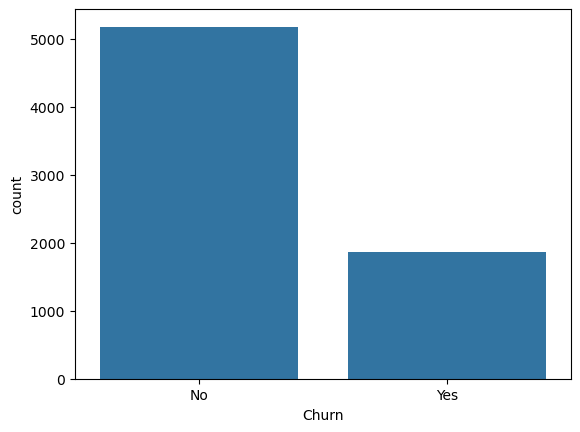

In [55]:
sns.countplot(x = df["Churn"])
plt.show()

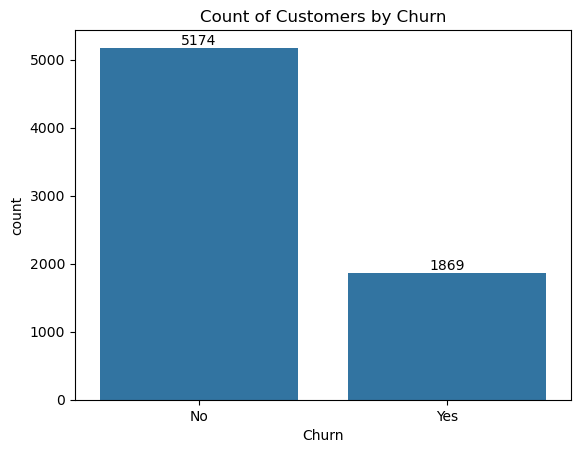

In [86]:
ax = sns.countplot(x = df["Churn"])
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

<function matplotlib.pyplot.pie(x: 'ArrayLike', explode: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, colors: 'ColorType | Sequence[ColorType] | None' = None, autopct: 'str | Callable[[float], str] | None' = None, pctdistance: 'float' = 0.6, shadow: 'bool' = False, labeldistance: 'float | None' = 1.1, startangle: 'float' = 0, radius: 'float' = 1, counterclock: 'bool' = True, wedgeprops: 'dict[str, Any] | None' = None, textprops: 'dict[str, Any] | None' = None, center: 'tuple[float, float]' = (0, 0), frame: 'bool' = False, rotatelabels: 'bool' = False, *, normalize: 'bool' = True, hatch: 'str | Sequence[str] | None' = None, data=None) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'>

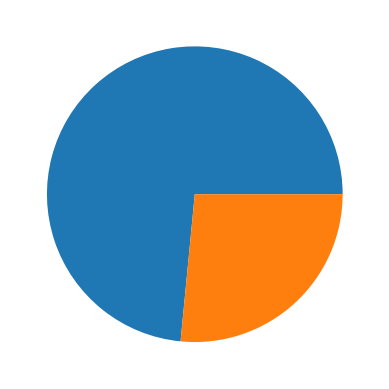

In [72]:
gb = df.groupby(["Churn"]).agg({"Churn":"count"}) #grouping by count of yes and no in churn
gb
plt.pie(gb['Churn'])
plt.pie
# shows without any labels 


<function matplotlib.pyplot.show(close=None, block=None)>

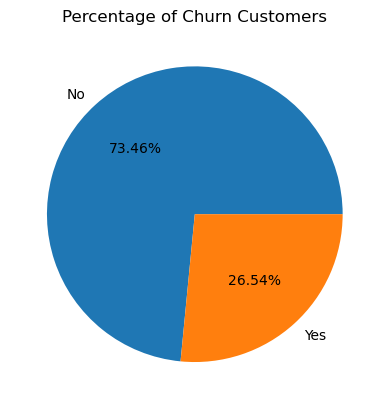

In [90]:
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title('Percentage of Churn Customers')
plt.show

#from the pie chart we can conclude that 26.54% of our customers have churned out
#lets explore the reason behind 

<function matplotlib.pyplot.show(close=None, block=None)>

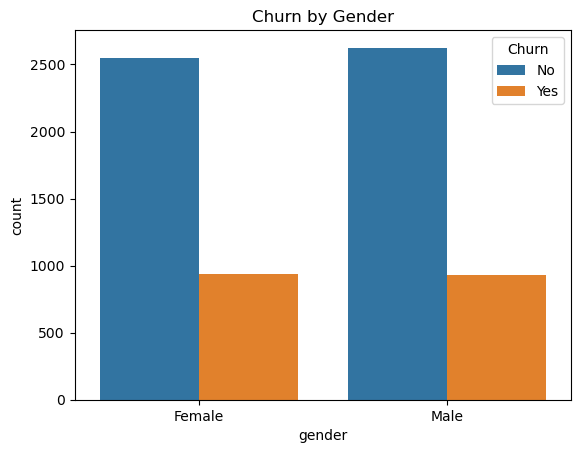

In [96]:
sns.countplot(x = df['gender'], data=df, hue="Churn")
plt.title("Churn by Gender")
plt.show

# there is no change in churn respective of gender so it is not gender specific

<function matplotlib.pyplot.show(close=None, block=None)>

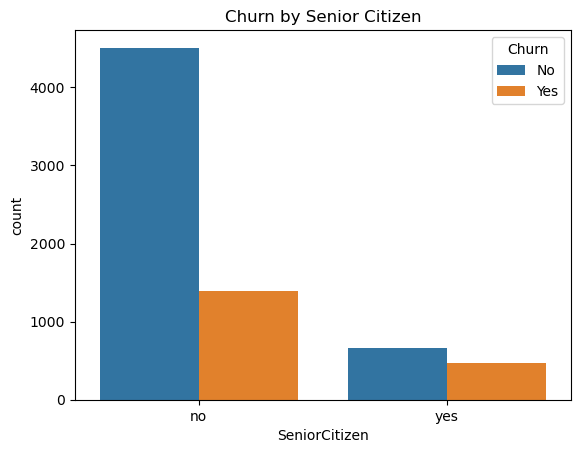

In [102]:
sns.countplot(x = df['SeniorCitizen'], data=df, hue="Churn")
plt.title("Churn by Senior Citizen")
plt.show

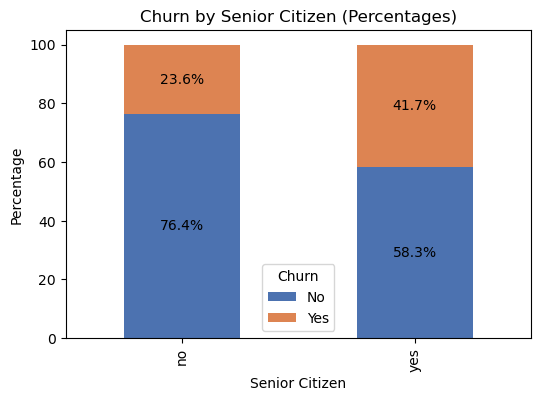

In [108]:
counts = df.groupby(["SeniorCitizen", "Churn"]).size().reset_index(name="count")

# Step 2: convert to percentages (normalize by SeniorCitizen group)
counts["percent"] = counts.groupby("SeniorCitizen")["count"].transform(lambda x: x / x.sum() * 100)
# Create pivot table for stacked bar
pivot = counts.pivot(index="SeniorCitizen", columns="Churn", values="percent")

custom_colors = ["#4c72b0", "#dd8452"]

ax = pivot.plot(
    kind="bar", 
    stacked=True, 
    figsize=(6,4), 
    color=custom_colors
)

# Add labels as percentages
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.title("Churn by Senior Citizen (Percentages)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn")
plt.show()



# comparatively a greater percentage of senior citizens have churned out

<function matplotlib.pyplot.show(close=None, block=None)>

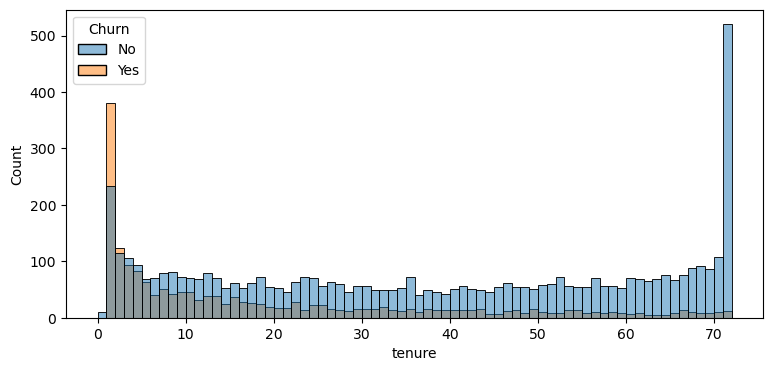

In [120]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show

#customers who have used company services for a long time have stayed and users who have not have churned out

<function matplotlib.pyplot.show(close=None, block=None)>

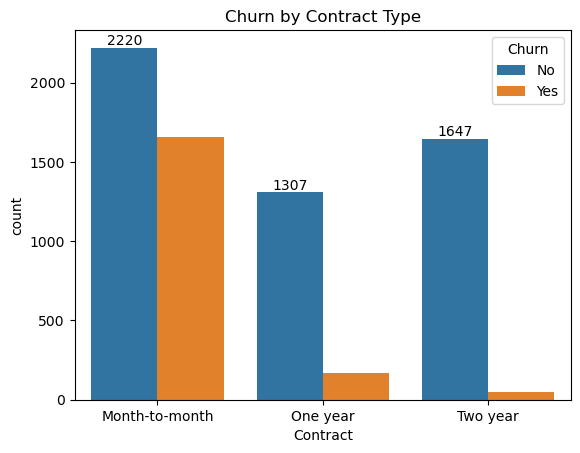

In [128]:
ax = sns.countplot(x = df['Contract'], data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract Type")
plt.show

# users with month-month contract are more likely to churn than annual contract users

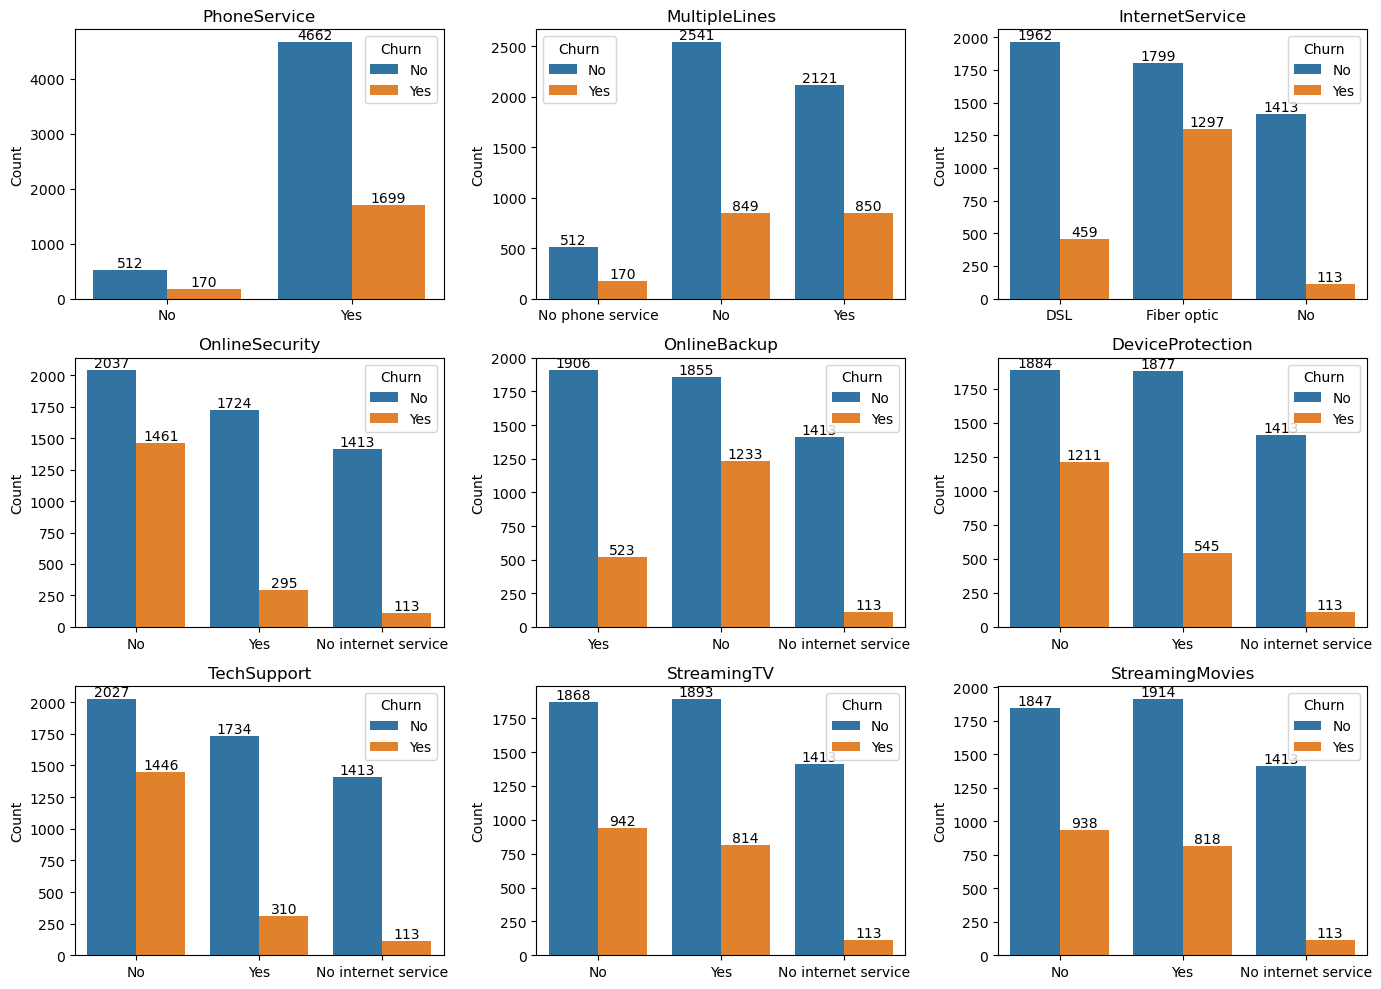

In [144]:
df.columns.values
cols = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
        'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

n = len(cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = sns.countplot(x=df[col], ax=axes[i], hue =df["Churn"])
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    for c in ax.containers:
        ax.bar_label(c)
    ax.tick_params(axis='x', rotation=0)

# hide any empty axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()